<a href="https://colab.research.google.com/github/pedromirsky/Calculo-Numerico/blob/main/FC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

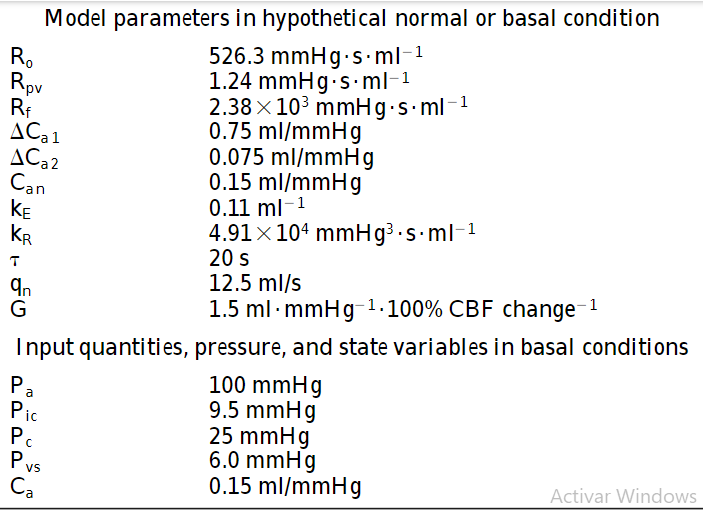

In [59]:
from sympy import *
import math
from numpy import linspace
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
from sympy.plotting import plot
import matplotlib.cm as cm




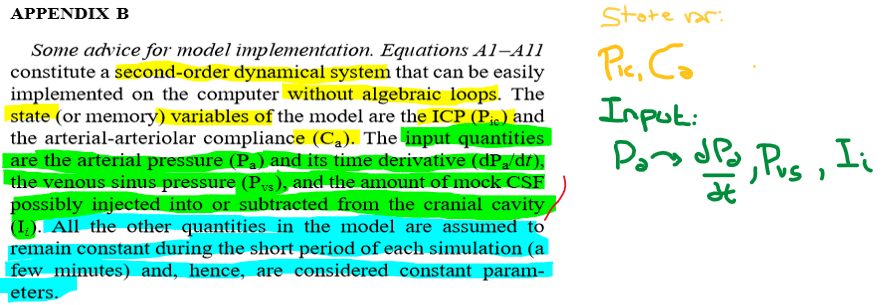

In [60]:
# state Pic , Ca
# Tomo valores iniciales Pic(0) = Pic, Ca(0) = Ca --> (valores de la tabla)

# tiempo
t = Symbol("t")

# var de estado
Pic = Function("Pic")
Ca = Function("Ca")

#input
Pa = Function("Pa")
dPa_dt = Pa(t).diff()
Pvs = Function("Pvs")
Ii = Function("Ii")


# Constantes:
Can = 0.15
Ro = 526.3
Rpv = 1.24
Rf = 2380
kE = 0.11
kR = 49100
tau = 20
qn = 12.5
deltaCa1 = 0.75
deltaCa2 = 0.075
G = 1.5
#Pc = 25

#Pic = 9.5
#Ca = 0.15

##Pvs = 6
##Pa = 100
## Ii = ?



#Cic = 1/(kE * Pic)
#Va = Ca *(Pa-Pic)

#q = (Pa-Pc)/Ra
#q
Ii(t)

Ii(t)

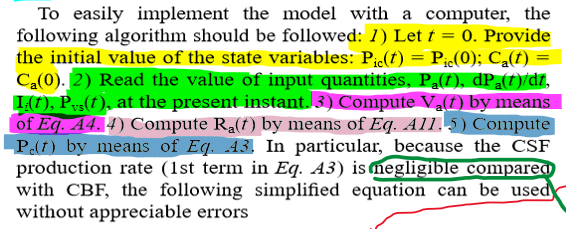

In [61]:
# 1:

#CCa = {Ca(0):0.15}
#CPic = {Pic(0):9.5}
CI = {Pic(0):9.5, Ca(0):0.15}

#ecuacion = Eq(dPa_dt,434343)
#ecuacion
#dsolve(ecuacion,Pa(t))
#CI = {Pa(0):200}
#dsolve(ecuacion,Pa(t),ics = CI)

# 2: ?
Pa(t), dPa_dt, Ii(t), Pvs(t)



(Pa(t), Derivative(Pa(t), t), Ii(t), Pvs(t))

In [62]:
#3
Va = Function("Va")
ecuacionVa = Eq(Va(t),Ca(t)*(Pa(t)-Pic(t)))
#dsolve(ecuacionVa,Va(t)) #,ics = CI  CI = {Pic(0):9.5, Ca(0):0.15}
ecuacionVa


Eq(Va(t), (Pa(t) - Pic(t))*Ca(t))

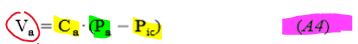

In [63]:
#4:
Ra = Function("Ra")
ecuacionRa = Eq(Ra(t),kR*(Can**2) / Va(t)**2)
ecuacionRa


Eq(Ra(t), 1104.75/Va(t)**2)

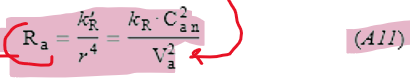

In [64]:
#5
Pc = Function("Pc")

ecuacionPc = Eq(Pc(t),(Pa(t)*Rpv + Pic(t)*Ra(t))/(Rpv + Ra(t))) 
ecuacionPc


Eq(Pc(t), (1.24*Pa(t) + Pic(t)*Ra(t))/(Ra(t) + 1.24))

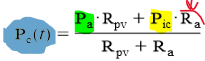

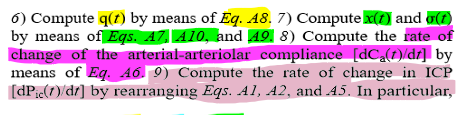

In [65]:
q = Function("q")
ecuacionq = Eq(q(t),(Pa(t)-Pc(t))/(Ra(t))) 
ecuacionq

Eq(q(t), (Pa(t) - Pc(t))/Ra(t))

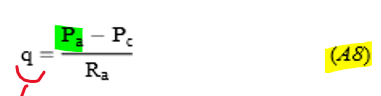

In [66]:
x = Function("x")
ecuacionx = Eq(x(t),(q(t)-qn)/(qn)) 
ecuacionx

Eq(x(t), 0.08*q(t) - 1.0)

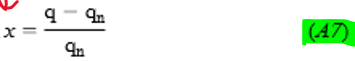

In [67]:
#7

# x = 4
deltaCa = 0
ko = 0
if (x < 0) :
  deltaCa = deltaCa1
  ko = deltaCa1/4
elif (x > 0):
     deltaCa = deltaCa2
     ko = deltaCa2/4




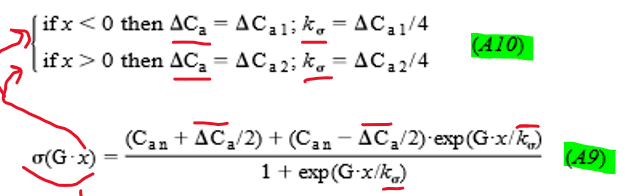

In [68]:
#7

omega = Function("σ")
import math
# omega(G*x((t)))
ecuacionOmega = (G*x((t)),(  (Can + deltaCa/2) + (Can - deltaCa/2)  * exp(G*x(t)/ko)  ) / (1+ exp(G*x(t)/ko))  )
ecuacionOmega


(1.5*x(t), (0.525 - 0.225*exp(8.0*x(t)))/(exp(8.0*x(t)) + 1))

In [69]:
# 8
dCa_dt = Ca(t).diff()
ecuaciondCa_dt = Eq(dCa_dt, (1/tau) * (-Ca(t) + omega(G*x((t)))) )
ecuaciondCa_dt

Eq(Derivative(Ca(t), t), -0.05*Ca(t) + 0.05*σ(1.5*x(t)))

In [70]:
# 9:

dPic_dt = Pic(t).diff()
ecuaciondPi_dt = Eq(dPic_dt, ( (kE * Pic(t))/(1+Ca(t)*kE*Pic(t)) ) * ( Ca(t) * dPa_dt + dCa_dt * (Pa(t) - Pic(t)) + (( Pc(t) - Pic(t))/Rf) - ((Pic(t)-Pvs(t))/(Ro)) + Ii(t) )  )
ecuaciondPi_dt

# dsolve(ecuaciondPi_dt,Pic(t)) --> runge kutta?
# dsolve(ecuacionVa,Va(t)) #,ics = CI  CI = {Pic(0):9.5, Ca(0):0.15}

Eq(Derivative(Pic(t), t), 0.11*((Pa(t) - Pic(t))*Derivative(Ca(t), t) + Ca(t)*Derivative(Pa(t), t) + Ii(t) + Pc(t)/2380 - 0.00232022506893694*Pic(t) + 0.00190005700171005*Pvs(t))*Pic(t)/(0.11*Ca(t)*Pic(t) + 1))

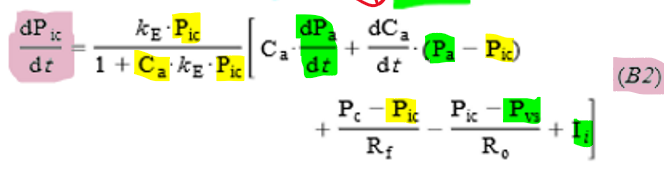

In [71]:
#GUI: Tkinter, PySide y Qt
# referencia: https://www.youtube.com/watch?v=41iFw58JmAU

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

x = np.linspace(0,2*np.pi,100) 

def plotter(A,B):
  y = A*np.sin(B*x)
  plt.plot(x,y)
  plt.grid()
  plt.ylim(-3,3)
  plt.show()

iplot = interactive(plotter,
                      A=(-3,3,0.1),
                      B=(1,5,0.5))
iplot

interactive(children=(FloatSlider(value=0.0, description='A', max=3.0, min=-3.0), FloatSlider(value=3.0, descr…

27090.13442202839

896.337814067613